In [4]:
import pickle
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import kruskal
import scipy.stats as stats
import scikit_posthocs as sp
from matplotlib import gridspec
import seaborn as sns

## General data set up

In [5]:
#get df of transcriptome, with columns as cells and rows as genes
with open('TIL_type_df.pkl', 'rb') as f:
   TIL_type_df = pickle.load(f)

In [6]:
#transpose to get genes as columns
TIL_type_df
TIL_type_df_t = TIL_type_df.transpose()
df = TIL_type_df_t.copy()

In [7]:
#get unique t cell types
biotin_dict = {}
for t in df['Type'].unique():
    biotin_dict[t] = df.loc[df['Type'] == t, 'Biotin'].tolist()

In [34]:
#check to see unique T cell types
types = df['Type'].unique()
print(types)

['Treg' 'Th1' 'CD8_EarlyActiv' 'CD8_NaiveLike' 'CD8_Tex'
 'CD8_EffectorMemory' 'CD8_Tpex' 'CD4_NaiveLike' 'Tfh']


## Statistical tests for comparisons of expression values

In [16]:
#get list of counts for each cell type
biotin_CD4_NaiveLike = list(biotin_dict['CD4_NaiveLike'])
biotin_Treg =  list(biotin_dict['Treg'])
biotin_Th1 =  list(biotin_dict['Th1'])               
biotin_CD8_EarlyActiv = list(biotin_dict['CD8_EarlyActiv'])
biotin_CD8_NaiveLike = list(biotin_dict['CD8_NaiveLike']) 
biotin_CD8_Tex = list(biotin_dict['CD8_Tex'])
biotin_CD8_Tpex = list(biotin_dict['CD8_Tpex'])
biotin_CD8_EffectorMemory = list(biotin_dict['CD8_EffectorMemory'])
biotin_Tfh = list(biotin_dict['Tfh'])       
 
#perform Kruskal-Wallis H-test
H, p = stats.kruskal(biotin_CD4_NaiveLike, biotin_Treg, biotin_Th1, biotin_CD8_EarlyActiv, 
                     biotin_CD8_NaiveLike, biotin_CD8_Tex, biotin_CD8_Tpex, biotin_CD8_EffectorMemory, 
                     biotin_Tfh)

# print the test results
print('Kruskal-Wallis H-test:')
print('H-statistic = {:.3f}'.format(H))
print('p-value = {:.3e}'.format(p))

Kruskal-Wallis H-test:
H-statistic = 6053.150
p-value = 0.000e+00


In [17]:
# perform post-hoc testing with Dunn's test
results_dunn = sp.posthoc_dunn(df, val_col='Biotin', group_col='Type', p_adjust='holm')
print('\nDunn test results:')
print(results_dunn)


Dunn test results:
                    CD4_NaiveLike  CD8_EarlyActiv  CD8_EffectorMemory   
CD4_NaiveLike        1.000000e+00    1.983577e-14        2.307723e-25  \
CD8_EarlyActiv       1.983577e-14    1.000000e+00        1.327072e-06   
CD8_EffectorMemory   2.307723e-25    1.327072e-06        1.000000e+00   
CD8_NaiveLike        2.001900e-05    1.630269e-15        1.126367e-59   
CD8_Tex             8.339162e-110   2.656306e-181       5.136847e-154   
CD8_Tpex             9.807446e-42    1.202923e-23        3.913999e-12   
Tfh                  1.184383e-04    4.052204e-01        3.556223e-02   
Th1                  2.250482e-04    3.798060e-17        1.270462e-56   
Treg                2.452508e-140   3.057620e-308       4.655533e-296   

                    CD8_NaiveLike        CD8_Tex      CD8_Tpex           Tfh   
CD4_NaiveLike        2.001900e-05  8.339162e-110  9.807446e-42  1.184383e-04  \
CD8_EarlyActiv       1.630269e-15  2.656306e-181  1.202923e-23  4.052204e-01   
CD8_Effec

SyntaxError: keyword argument repeated: annot_kws (2856302076.py, line 25)

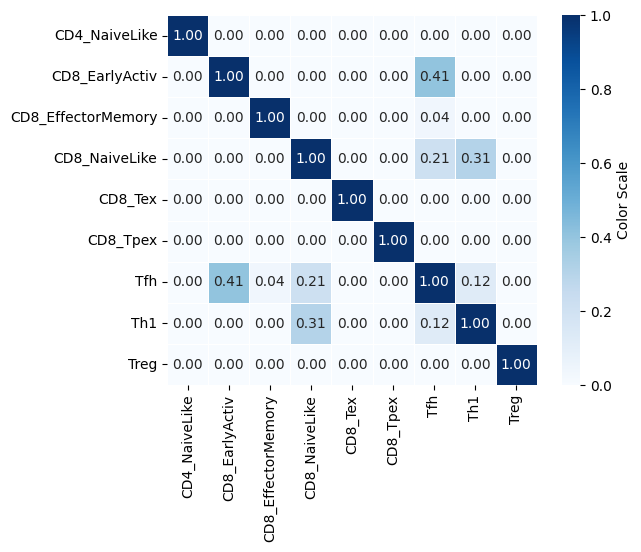

In [20]:
#view matrix of pairwise tests

masks = [(results_dunn.values < 0.001, 0),
         ((0.001 < results_dunn.values) & (results_dunn.values < 0.05), 1), 
         ((0.05 < results_dunn.values) & (results_dunn.values < 0.01), 2), 
         ((0.01 < results_dunn.values) & (results_dunn.values < 0.1), 3),
         (results_dunn.values > 0.1, 4)]

# Define a color palette with 4 colors
palette = sns.color_palette("Blues", n_colors=5)

# Create a heatmap with masks and color codes
ax = sns.heatmap(results_dunn, cmap="Blues", linewidths=.5,
                 annot=True, annot_kws={"size": 10}, fmt='.2f',
                 cbar_kws={'label': 'Color Scale'}, mask=None, 
                 square=True, xticklabels=True, yticklabels=True)

for mask, color_idx in masks:
    color = palette[color_idx]
    ax = sns.heatmap(results_dunn, cmap="Blues", linewidths=.5,
                 annot=True, annot_kws={"size": 10},fmt='.2f',
                 cbar_kws={'label': 'Color Scale'}, mask=mask, 
                 square=True, xticklabels=True, yticklabels=True, 
                 cbar=False, alpha=0.5, 
                 annot_kws={"color": "white", "fontsize": 10},
                 linecolor='white', center=None)
    
plt.savefig("c.png", format="png")

## Making violin plots

In [21]:
df

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Biotin,Type
AAACCTGAGATGGCGT-1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1052,Treg
AAACCTGAGCGAGAAA-1,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,1,799,Th1
AAACCTGAGCTGGAAC-1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,231,Treg
AAACCTGAGGATTCGG-1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,507,Th1
AAACCTGAGTCTCAAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,197,CD8_EarlyActiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCATGTCTT-1,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,2,0,0,221,CD8_EffectorMemory
TTTGTCATCCAATGGT-1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,173,CD8_EffectorMemory
TTTGTCATCGGATGGA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,247,CD8_NaiveLike
TTTGTCATCTACTTAC-1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,174,Th1


In [28]:
#add to df
df['Biotin_plus1'] = df['Biotin'] + 1
df['Biotin_log10'] = np.log(df['Biotin_plus1'].astype(float))

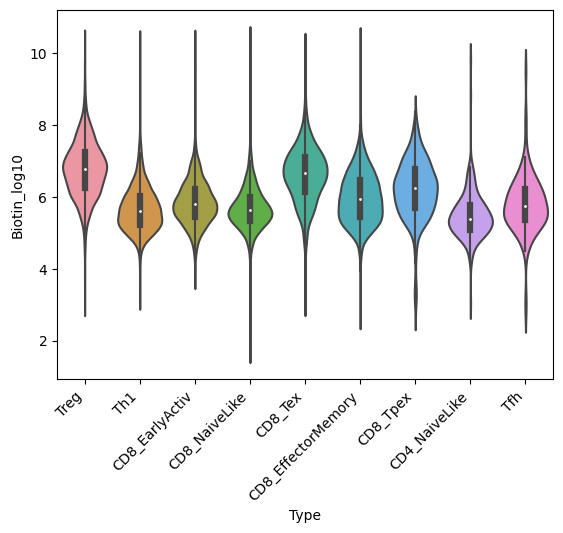

In [38]:
# Set up the violin plot
ax = sns.violinplot(x="Type", y="Biotin_log10", data=df, scale='width')


# Set up the IQR thresholds
for t in df['Type'].unique():
    subset = df[df['Type'] == t]
    q1 = subset['Biotin_log10'].quantile(0.25)
    q3 = subset['Biotin_log10'].quantile(0.75)
    iqr = q3 - q1
    lower_thresh = q1 - 1.5 * iqr
    upper_thresh = q3 + 1.5 * iqr
    median = subset['Biotin_log10'].median()
    upper_adjacent_value = subset[subset['Biotin_log10'] <= upper_thresh]['Biotin_log10'].max()
    lower_adjacent_value = subset[subset['Biotin_log10'] >= lower_thresh]['Biotin_log10'].min()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Show the plot
plt.show()